In [2]:
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
from skimage import measure
import os, cv2

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from PIL import Image
from sklearn.metrics import silhouette_score
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 
from sklearn.decomposition import PCA
# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model
import pickle

Using TensorFlow backend.
c:\Users\akars\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\akars\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\akars\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\akars\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
img_index = []

In [35]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(os.path.join("dataset_features", file), target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

Instructions for updating:
Colocations handled automatically by placer.


In [36]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [37]:
# Get a list of file names in the directory
file_names = os.listdir("dataset_features")
p = r"C:\Users\akars\Desktop\Studies\Internships\BioLab\BioLab Work\Cow Stress\ImageProj\dataset_features"
# Sort the list of file names alphabetically
sorted_file_names = sorted(file_names, key=lambda x: int(x.split("_")[0]))
data = {}

# Loop over all the images
for filename in sorted_file_names:
    
    # Load image
    if filename.endswith("thermal.jpg") :
        index = int(filename.split("_")[0])
        if index in img_index:
            try:
                feat = extract_features(filename, model)
                data[index] = feat
        # if something fails, save the extracted features as a pickle file (optional)
            except:
                with open(p,'wb') as file:
                    pickle.dump(data,file)

In [38]:
print(data)

{0: array([[0.        , 0.21771693, 1.4746828 , ..., 0.        , 0.        ,
        0.6488475 ]], dtype=float32), 1: array([[0.        , 0.45234498, 1.9746944 , ..., 0.        , 0.        ,
        0.8316392 ]], dtype=float32), 2: array([[0.        , 0.11669675, 2.1385043 , ..., 0.        , 0.        ,
        0.8627497 ]], dtype=float32), 3: array([[0.        , 0.01755866, 3.3989892 , ..., 0.        , 0.        ,
        1.0685377 ]], dtype=float32), 4: array([[0.        , 0.19497892, 2.89646   , ..., 0.        , 0.        ,
        0.6531888 ]], dtype=float32), 5: array([[0.        , 0.21026492, 2.7622743 , ..., 0.        , 0.        ,
        0.7648019 ]], dtype=float32), 6: array([[0.        , 0.14224687, 2.4030797 , ..., 0.        , 0.        ,
        0.73021114]], dtype=float32), 7: array([[0.        , 0.38263118, 1.7163197 , ..., 0.        , 0.        ,
        0.91997015]], dtype=float32), 8: array([[0.        , 0.3100902 , 2.9936843 , ..., 0.        , 0.        ,
        0.8

In [39]:
# get a list of just the features
feat = np.array(list(data.values()))
print(feat.shape)
print(feat)
# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

(255, 1, 4096)
[[[0.         0.21771693 1.4746828  ... 0.         0.         0.6488475 ]]

 [[0.         0.45234498 1.9746944  ... 0.         0.         0.8316392 ]]

 [[0.         0.11669675 2.1385043  ... 0.         0.         0.8627497 ]]

 ...

 [[0.         1.0654956  1.2796012  ... 0.         0.         0.32224402]]

 [[0.         0.08521646 3.1575394  ... 0.         0.         0.4683743 ]]

 [[0.         0.26331234 1.9135772  ... 0.         0.         0.937479  ]]]


In [40]:
print(feat.shape)

(255, 4096)


In [41]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [42]:
# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3)
# Fit the KMeans model to the data
kmeans.fit(x)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the centroids of each cluster
centroids = kmeans.cluster_centers_

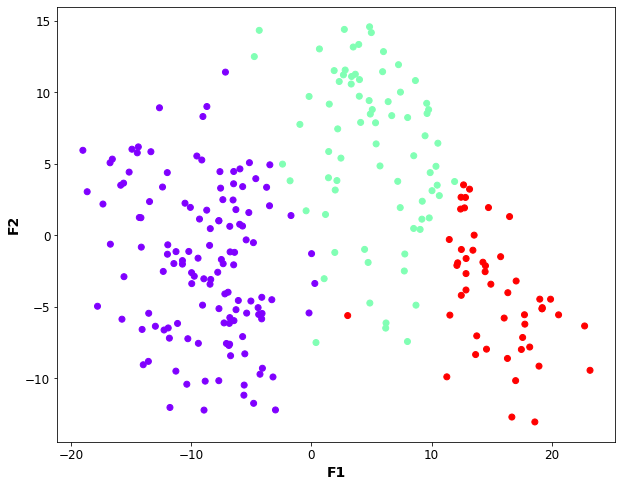

In [43]:
# Apply dimensionality reduction using pca
pca_vis = PCA(n_components=2, random_state=42)
reduced_features = pca_vis.fit_transform(x)
# Plot the data points with different colors for each cluster
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='rainbow')
plt.xlabel('F1', fontsize=14, fontweight='bold')
plt.ylabel('F2', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [44]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(x, labels)

print(f"The average silhouette score is: {silhouette_avg}")

The average silhouette score is: 0.1879739910364151


## Manual Features 

In [32]:
# Define the number of clusters
n_clusters = 2

# Define the criteria for "good" or "bad" images
criteria = ["smoothness"]
eye_smoothness, eye_area, eye_perimeter, eye_var = [], [], [], []
high_temp_smoothness, high_temp_area, high_temp_perimeter, high_temp_var = [], [], [], []


# Get a list of file names in the directory
file_names = os.listdir("dataset_features")

# Sort the list of file names alphabetically
sorted_file_names = sorted(file_names, key=lambda x: int(x.split("_")[0]))

# Loop over all the images
for filename in sorted_file_names:
    
    # Load image
    if filename.endswith("eye.jpg") :
        index = int(filename.split("_")[0])
        img_index.append(index)

        img_array = cv2.imread(os.path.join("dataset_features", filename))

        # convert the image to grayscale
        gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

        # perform thresholding to separate the shapes from the background
        thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]

        # perform contour detection
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # draw the contours on the original image
        cv2.drawContours(img_array, contours, -1, (0, 255, 0), 2)

        # Apply Laplacian operator
        laplacian = cv2.Laplacian(gray, cv2.CV_64F)

        # Calculate the variance of the Laplacian image
        variance = np.var(laplacian)
        eye_var.append(variance)
        
        # Calculate the perimeter and smoothness of each shape
        smoothness = []
        area_ = []
        perimeter_ = []
        for contour in contours:
            perimeter = cv2.arcLength(contour, True)
            area = cv2.contourArea(contour)
            area_.append(area)
            perimeter_.append(perimeter)
            smoothness.append(perimeter / (2 * np.sqrt(np.pi * area)))
            
        # Calculate the average smoothness of all shapes in the image
        if len(smoothness) > 0:
            avg_smoothness = np.mean(smoothness)
            avg_area = np.mean(area)
            avg_perimeter = np.mean(perimeter)
        else:
            avg_smoothness = 0
            
        eye_smoothness.append(avg_smoothness)
        eye_area.append(avg_area)
        eye_perimeter.append(avg_perimeter)

    elif filename.endswith("thermal.jpg"):
        img_array = cv2.imread(os.path.join("dataset_features", filename))

        # convert the image to grayscale
        gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

        # perform thresholding to separate the shapes from the background
        thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]

        # perform contour detection
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # draw the contours on the original image
        cv2.drawContours(img_array, contours, -1, (0, 255, 0), 2)
        
        # Apply Laplacian operator
        laplacian = cv2.Laplacian(gray, cv2.CV_64F)

        # Calculate the variance of the Laplacian image
        variance = np.var(laplacian)
        high_temp_var.append(variance)


       # Calculate the perimeter and smoothness of each shape
        smoothness = []
        area_ = []
        perimeter_ = []
        for contour in contours:
            perimeter = cv2.arcLength(contour, True)
            area = cv2.contourArea(contour)
            area_.append(area)
            perimeter_.append(perimeter)
            smoothness.append(perimeter / (2 * np.sqrt(np.pi * area)))
            
        # Calculate the average smoothness of all shapes in the image
        if len(smoothness) > 0:
            avg_smoothness = np.mean(smoothness)
            avg_area = np.mean(area)
            avg_perimeter = np.mean(perimeter)
        else:
            avg_smoothness = 0
            
        high_temp_smoothness.append(avg_smoothness)
        high_temp_area.append(avg_area)
        high_temp_perimeter.append(avg_perimeter)



        

Average Intensity Calculation

In [5]:
def calculate_average_intensity(image):
    # Step 1: Thresholding to create a binary mask
    _, binary_mask = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)  # Modify threshold value as needed

    # Step 2: Find contours or connected components in the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 3: Calculate average intensity of high-intensity region
    total_intensity = 0
    total_pixels = 0
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        region_of_interest = image[y:y + h, x:x + w]
        total_intensity += np.sum(region_of_interest)
        total_pixels += np.size(region_of_interest)

    average_intensity = total_intensity / total_pixels
    return average_intensity


dir = "dataset_features"
avg_intensities = {}
# Loop over all the images
for filename in os.listdir(dir):
    # Load image
    if filename.endswith("cow.jpg"):
        img = cv2.imread(os.path.join(dir, filename))
        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Calculate average intensity
        average_intensity = calculate_average_intensity(gray)
        avg_intensities[filename] = average_intensity

print(avg_intensities)

        

C:\Users\akars\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\akars\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'0_eye.jpg': 255.0, '100_eye.jpg': 255.0, '101_eye.jpg': 255.0, '102_eye.jpg': 255.0, '103_eye.jpg': 255.0, '104_eye.jpg': 255.0, '105_eye.jpg': 255.0, '106_eye.jpg': 255.0, '107_eye.jpg': 255.0, '108_eye.jpg': 255.0, '109_eye.jpg': 255.0, '10_eye.jpg': 255.0, '110_eye.jpg': 255.0, '111_eye.jpg': 255.0, '112_eye.jpg': 255.0, '113_eye.jpg': 255.0, '114_eye.jpg': 255.0, '115_eye.jpg': 255.0, '116_eye.jpg': 255.0, '117_eye.jpg': 255.0, '118_eye.jpg': 255.0, '119_eye.jpg': 255.0, '11_eye.jpg': 255.0, '120_eye.jpg': 255.0, '121_eye.jpg': 255.0, '122_eye.jpg': 255.0, '123_eye.jpg': 255.0, '124_eye.jpg': 255.0, '125_eye.jpg': 255.0, '126_eye.jpg': 255.0, '127_eye.jpg': 255.0, '128_eye.jpg': 255.0, '129_eye.jpg': 255.0, '12_eye.jpg': 255.0, '130_eye.jpg': 255.0, '131_eye.jpg': 255.0, '132_eye.jpg': 255.0, '133_eye.jpg': 255.0, '134_eye.jpg': 255.0, '135_eye.jpg': 255.0, '136_eye.jpg': 255.0, '137_eye.jpg': 255.0, '138_eye.jpg': 255.0, '139_eye.jpg': 255.0, '13_eye.jpg': 255.0, '140_eye.jpg': 

Noses

In [4]:
# Define the number of clusters
n_clusters = 2

# Define the criteria for "good" or "bad" images
criteria = ["smoothness"]
nose_smoothness, nose_area, nose_perimeter, nose_var = [], [], [], []

# Get a list of file names in the directory
file_names = os.listdir("noses")

# Sort the list of file names alphabetically
sorted_file_names = sorted(file_names, key=lambda x: int(x.split("_")[0]))

# Loop over all the images
for filename in sorted_file_names:
    
    # Load image
    if filename.endswith("nose.jpg") :
        index = int(filename.split("_")[0])
        img_index.append(index)

        img_array = cv2.imread(os.path.join("noses", filename))

        # convert the image to grayscale
        gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

        # perform thresholding to separate the shapes from the background
        thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]

        # perform contour detection
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # draw the contours on the original image
        cv2.drawContours(img_array, contours, -1, (0, 255, 0), 2)

        # Apply Laplacian operator
        laplacian = cv2.Laplacian(gray, cv2.CV_64F)

        # Calculate the variance of the Laplacian image
        variance = np.var(laplacian)
        nose_var.append(variance)
        
        # Calculate the perimeter and smoothness of each shape
        smoothness = []
        area_ = []
        perimeter_ = []
        for contour in contours:
            perimeter = cv2.arcLength(contour, True)
            area = cv2.contourArea(contour)
            area_.append(area)
            perimeter_.append(perimeter)
            smoothness.append(perimeter / (2 * np.sqrt(np.pi * area)))
            
        # Calculate the average smoothness of all shapes in the image
        if len(smoothness) > 0:
            avg_smoothness = np.mean(smoothness)
            avg_area = np.mean(area)
            avg_perimeter = np.mean(perimeter)
        else:
            avg_smoothness = 0
            
        nose_smoothness.append(avg_smoothness)
        nose_area.append(avg_area)
        nose_perimeter.append(avg_perimeter)


        

In [5]:
print(nose_area)

[391.0, 1290.0, 1276.0, 625.0, 1548.0, 1364.0, 2750.0, 783.0, 2268.0, 1504.0, 1584.0, 5130.0, 960.0, 2646.0, 920.0, 24.0, 1920.0, 1320.0, 1290.0, 1290.0, 1290.0, 540.0, 540.0, 1333.0, 1333.0, 1333.0, 1333.0, 1333.0, 1333.0, 1333.0, 1276.0, 1911.0, 2940.0, 648.0, 644.0, 625.0, 625.0, 625.0, 625.0, 625.0, 625.0, 1960.0, 1960.0, 1960.0, 1960.0, 1960.0, 1960.0, 1960.0, 1960.0, 1960.0, 1548.0, 1548.0, 1920.0, 1920.0, 891.0, 910.0, 780.0, 891.0, 756.0, 896.0, 783.0, 783.0, 783.0, 700.0, 806.0, 810.0, 728.0, 1140.0, 972.0, 858.0, 884.0, 945.0, 918.0, 960.0, 960.0, 1776.0, 2107.0, 783.0, 783.0, 783.0, 783.0, 783.0, 630.0, 468.0, 2052.0, 2052.0, 1998.0, 1944.0, 2268.0, 2268.0, 2268.0, 2132.0, 2132.0, 1768.0, 1768.0, 1820.0, 1908.0, 748.0, 748.0, 1504.0, 391.0, 1989.0, 1472.0, 770.0, 1472.0, 1598.0, 2376.0, 1296.0, 2915.0, 2862.0, 4914.0, 4806.0, 4914.0, 5005.0, 5076.0, 5115.0, 2709.0, 2623.0, 2640.0, 5130.0, 5130.0, 2160.0, 1521.0, 1521.0, 1296.0, 1296.0, 1296.0, 1330.0, 960.0, 960.0, 1794.0, 1

In [33]:
print(len(eye_smoothness))
# print(eye_area)
# print(eye_perimeter)
# print(high_temp_smoothness)
# print(high_temp_area)
# print(high_temp_perimeter)
# print(eye_var)
# print(high_temp_var)
# print(img_index)
print(len(eye_area))
print(len(high_temp_area))
print(img_index)

255
255
255
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 53, 11, 75, 139, 174, 206, 238, 2, 18, 34, 50, 66, 82, 94, 101, 105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149, 153, 157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197, 201, 205, 209, 213, 217, 221, 225, 229, 233, 237, 241, 245, 247, 249, 251, 253, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167

In [34]:

# Load the data from the Excel file
data = pd.read_excel('Profile_View.xlsx')
image_paths = data['Image_Path'].values
labels = data['Profile_View'].values

ids_to_delete = []
# Iterate over the excel file 
for index, row in data.iterrows():
      if row['Profile_View'] == 0:
            cow_id = row['Cow_ID']
            ids_to_delete.append(cow_id)
            # delete entries in high_temp_smoothness corresponding to the indices in ids_to_delete
ids_to_delete = sorted(ids_to_delete, reverse=True)
for id in ids_to_delete:
      del img_index[id]



In [ ]:
# print the cow images corresponding to the indices in the index list
for index in img_index:
    img = Image.open(os.path.join("dataset_features", str(index) + "_thermal.jpg"))
    display(img)

In [47]:
# Scale the features to be between 0 and 1
eye_smoothness = (eye_smoothness - np.min(eye_smoothness)) / (np.max(eye_smoothness) - np.min(eye_smoothness))
eye_area = (eye_area - np.min(eye_area)) / (np.max(eye_area) - np.min(eye_area))
eye_perimeter = (eye_perimeter - np.min(eye_perimeter)) / (np.max(eye_perimeter) - np.min(eye_perimeter))
high_temp_smoothness = (high_temp_smoothness - np.min(high_temp_smoothness)) / (np.max(high_temp_smoothness) - np.min(high_temp_smoothness))
high_temp_area = (high_temp_area - np.min(high_temp_area)) / (np.max(high_temp_area) - np.min(high_temp_area))
high_temp_perimeter = (high_temp_perimeter - np.min(high_temp_perimeter)) / (np.max(high_temp_perimeter) - np.min(high_temp_perimeter))
eye_var = (eye_var - np.min(eye_var)) / (np.max(eye_var) - np.min(eye_var))
high_temp_var = (high_temp_var - np.min(high_temp_var)) / (np.max(high_temp_var) - np.min(high_temp_var))

In [48]:
# Calculate the changes in the features per time step
eye_smoothness_diff = np.gradient(eye_smoothness)
eye_area_diff = np.gradient(eye_area)
eye_perimeter_diff = np.gradient(eye_perimeter)
high_temp_smoothness_diff = np.gradient(high_temp_smoothness)
high_temp_area_diff = np.gradient(high_temp_area)
high_temp_perimeter_diff = np.gradient(high_temp_perimeter)
eye_var_diff = np.gradient(eye_var)
high_temp_var_diff = np.gradient(high_temp_var)

high_temp_area_diff2 = np.diff(high_temp_area)
high_temp_perimeter_diff2 = np.diff(high_temp_perimeter)


In [61]:

# Get the indices that would sort the array in descending order
idxs_sorted = np.argsort(high_temp_area_diff)[::-1]

# Get the first 10 elements and their indices
top_10_values = high_temp_area_diff[idxs_sorted][:10]
top_10_indices = idxs_sorted[:10]

# Get the indices that would sort the array in descending order
idxs_sorted2 = np.argsort(high_temp_area_diff2)[::-1]

# Get the first 10 elements and their indices
top_10_values2 = high_temp_area_diff2[idxs_sorted2][:10]
top_10_indices2 = idxs_sorted2[:10]

# Take the union of the two lists
top_10_values = np.union1d(top_10_values, top_10_values2)
top_10_indices = np.union1d(top_10_indices, top_10_indices2)

# Print the results
print("Top 10 values:", top_10_values)
print("Top 10 indices:", top_10_indices)

Top 10 values: [0.13196942 0.13615108 0.14027278 0.14031775 0.14404976 0.15058453
 0.17282674 0.21479317 0.21714628 0.22095324 0.2364958  0.24952038
 0.25434652 0.26414868 0.27544964 0.27559952 0.28303357 0.32892686
 0.47299161]
Top 10 indices: [  0  23  28  29  31  32  35 149 150 156 166 170 184 231 232 233 252]


In [49]:
# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3)
actual_features = {'eye_smoothness': eye_smoothness, 'eye_area': eye_area, 'eye_perimeter': eye_perimeter, 
                  'high_temp_smoothness': high_temp_smoothness, 'high_temp_area': high_temp_area, 'high_temp_perimeter': high_temp_perimeter, 
                  'eye_var': eye_var, 'high_temp_var': high_temp_var }
gradient_featues = {
                  'eye_smoothness_diff': eye_smoothness_diff, 'eye_area_diff': eye_area_diff,
                  'eye_perimeter_diff': eye_perimeter_diff, 'high_temp_smoothness_diff': high_temp_smoothness_diff,
                  'high_temp_area_diff': high_temp_area_diff, 'high_temp_perimeter_diff': high_temp_perimeter_diff,
                  'eye_var_diff': eye_var_diff, 'high_temp_var_diff': high_temp_var_diff
                  }
X = pd.DataFrame(gradient_featues)

# Fit the KMeans model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the centroids of each cluster
centroids = kmeans.cluster_centers_

In [50]:
print(centroids)
print(labels)


[[ 3.92188902e-02 -7.91226471e-02 -1.00015131e-01  1.81539875e-01
   6.72064859e-02  1.65308658e-01  4.20240350e-02  1.64075689e-01]
 [-1.05721504e-02  2.30723391e-02  2.94166558e-02 -7.10006512e-03
   1.13946379e-03 -6.56126714e-03 -2.39296852e-04 -6.54110018e-03]
 [-1.36460671e-02 -4.05543866e-02 -5.22485876e-02 -2.63682540e-01
  -1.03049155e-01 -2.29712547e-01 -5.53279483e-02 -2.29331075e-01]]
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 1 0 0 1 1 1 0 2 2 1 1 1 1 2 1 1 1
 2 1 0 1 1 1 2 2 1 1 1 1 1 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 2 2 0 1 0 0 2 2 0 1 2 0 0 2 2
 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0]


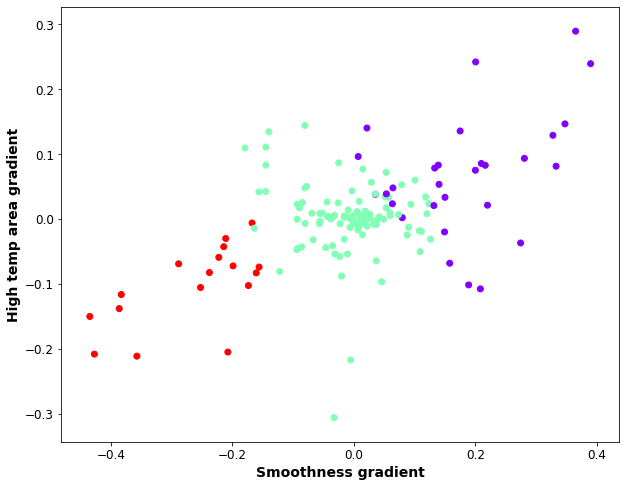

In [51]:
# Plot the data points with different colors for each cluster
plt.figure(figsize=(10, 8))
plt.scatter(X['high_temp_smoothness_diff'], X['high_temp_area_diff'], c=labels, cmap='rainbow')
plt.xlabel('Smoothness gradient', fontsize=14, fontweight='bold')
plt.ylabel('High temp area gradient', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


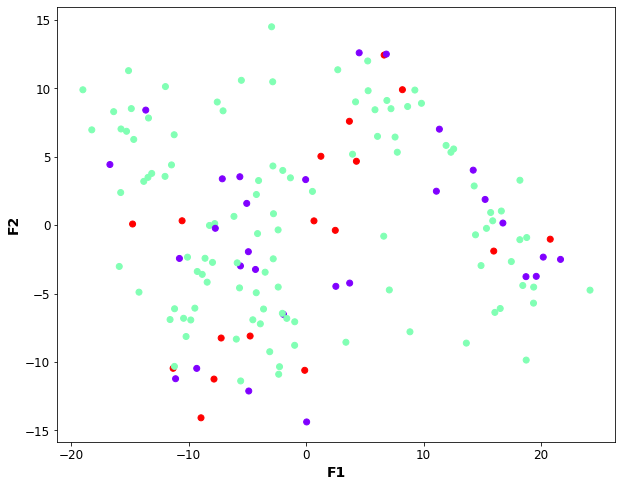

In [52]:
# Apply dimensionality reduction using pca
pca_vis = PCA(n_components=2, random_state=42)
reduced_features = pca_vis.fit_transform(x)
# Plot the data points with different colors for each cluster
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='rainbow')
plt.xlabel('F1', fontsize=14, fontweight='bold')
plt.ylabel('F2', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

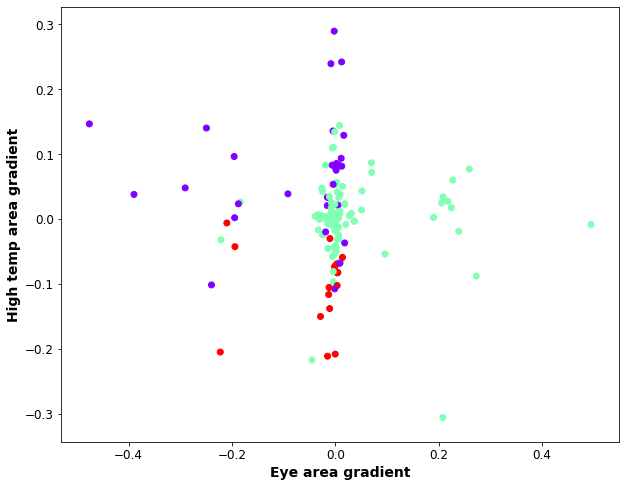

In [53]:
# Plot the data points with different colors for each cluster
plt.figure(figsize=(10, 8))
plt.scatter(X['eye_area_diff'], X['high_temp_area_diff'], c=labels, cmap='rainbow')
plt.xlabel('Eye area gradient', fontsize=14, fontweight='bold')
plt.ylabel('High temp area gradient', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [54]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)

print(f"The average silhouette score is: {silhouette_avg}")

The average silhouette score is: 0.37251046187511505


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X, labels)

# Retrieve feature importances
feature_importances = rf.feature_importances_
feature_importances = list(zip(rf.feature_importances_, X.columns))
feature_importances.sort(reverse=True)

# Print the feature importances
for feature_id, importance in enumerate(feature_importances):
    print(f"Feature {feature_id+1} importance: {importance}")

Feature 1 importance: (0.29894093498208163, 'high_temp_var_diff')
Feature 2 importance: (0.29410851203700106, 'high_temp_perimeter_diff')
Feature 3 importance: (0.20602056837289734, 'high_temp_smoothness_diff')
Feature 4 importance: (0.10602245761629255, 'high_temp_area_diff')
Feature 5 importance: (0.036098030858293356, 'eye_var_diff')
Feature 6 importance: (0.02642569118931075, 'eye_area_diff')
Feature 7 importance: (0.01729946127361562, 'eye_smoothness_diff')
Feature 8 importance: (0.015084343670507695, 'eye_perimeter_diff')


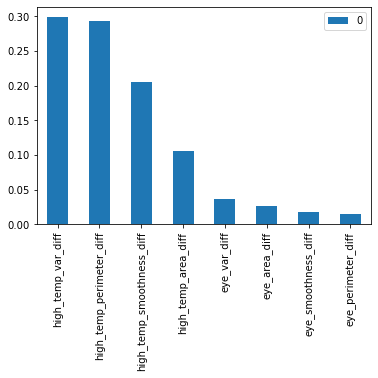

In [27]:
pd.DataFrame(feature_importances, index=[x for (_,x) in feature_importances]).plot(kind = 'bar')

In [15]:
# get the indices of the elements in third cluster
print("Third cluster indices:")
print(np.where(labels == 2))


Third cluster indices:
(array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        16,  19,  21,  22,  23,  25,  26,  28,  31,  35,  38,  39,  40,
        42,  43,  45,  49,  50,  51,  52,  53,  55,  57,  59,  60,  62,
        65,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  83,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 102, 104, 105, 106, 107, 108, 109, 110,
       111, 114, 115, 117, 119, 120, 121, 124, 125, 126, 128, 129, 130,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146,
       147, 148, 149, 150, 152, 153, 154, 157, 158, 161, 164, 165, 167,
       169, 172, 175, 177, 179, 185, 190, 191, 192, 193, 196, 197, 198,
       199, 200, 201, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
       227, 228, 229, 230, 234, 236, 237, 240, 241, 242, 243, 244, 246,
       247, 248, 249, 250, 251, 252], dt

In [46]:
# print the intersection of the array of indices of the elements in the third cluster and the array of indices of the top 10 elements
print("Intersection:")
#stressed_images = np.intersect1d(np.where(labels == 2), top_10_indices)
stressed_images = np.array(np.where(labels == 2))
# Get the images in the second cluster
med_stress = np.array(np.where(labels == 1))
# Get the images in the first cluster
low_stress = np.array(np.where(labels == 0))
print(stressed_images)

Intersection:
[[ 87 118 119 120 121 123 124 125 163 164 165 166 168 169 170 174 176 177
  182 183 189 190 191 193 194 195 197 198 201 205 206 207 208 209 210 211
  212 213 214 215 216 217 218 219 220 221 222 229 230 231]]


In [ ]:
# print the cow images that are in the third cluster and have the top 10 values
print("Cow images:")
# Get a list of file names in the directory
file_names = os.listdir("dataset_features")

# Sort the list of file names alphabetically
sorted_file_names = sorted(file_names, key=lambda x: int(x.split("_")[0]))

# Loop over all the images
for filename in sorted_file_names:
    
    # Load image
    if filename.endswith("main.jpg"):
        # print a table of images where the first column is stressed images, second column is medium stress images, and third column is low stress images

        # print the image if it is in the third cluster and has the top 10 values
        if int(filename.split("_")[0]) in stressed_images:
            print(filename)
            image = cv2.imread("dataset_features/" + filename)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(image)
            plt.show()

# print the cow images that are in the second cluster 
        elif int(filename.split("_")[0]) in med_stress:
            print(filename)
            image = cv2.imread("dataset_features/" + filename)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(image)
            plt.show()
        
# print the cow images that are in the first cluster
        elif int(filename.split("_")[0]) in low_stress:
            print(filename)
            image = cv2.imread("dataset_features/" + filename)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(image)
            plt.show()


In [47]:


# define your arrays of images
array1 = []
array2 = []
array3 = []


# Get a list of file names in the directory
file_names = os.listdir("dataset_features")

# Sort the list of file names alphabetically
sorted_file_names = sorted(file_names, key=lambda x: int(x.split("_")[0]))

for fileindex in stressed_images[0]:
    filepath = "dataset_features/" + str(fileindex) + "_main.jpg"
    array1.append(filepath)

for fileindex in med_stress[0]:
    filepath = "dataset_features/" + str(fileindex) + "_main.jpg"
    array2.append(filepath)

for fileindex in low_stress[0]:
    filepath = "dataset_features/" + str(fileindex) + "_main.jpg"
    array3.append(filepath)



In [48]:
print(len(array1))
print(len(array3))

50
129


In [39]:

row_html = "<div class='row'>"

for i in range(3):
    row_html += f"<img src='{array1[i]}' style='width:33%;'>"

row_html += "</div>"

HTML(row_html)

In [19]:

def create_image_row(image_array):
    row_html = "<div class='row'>"
    num_images = len(image_array)
    for i in range(num_images):
        row_html += f"<img src='{image_array[i]}' style='width:{100/num_images}%;'>"
    row_html += "</div>"
    return row_html

num_rows = max(len(array1), len(array2), len(array3))

table_html = "<table style='border: 1px solid green;'>"
table_html += f"<td style='border: 1px solid green font-size:24px;font-weight:bold;'>{'High Stress'}</td>"
table_html += f"<td style='border: 1px solid green font-size:24px;font-weight:bold;'>{'Medium Stress'}</td>"
table_html += f"<td style='border: 1px solid green font-size:24px;font-weight:bold;'>{'Low Stress'}</td>"
for i in range(num_rows):
    table_html += "<tr>"
    if i < len(array1):
        table_html += f"<td style='border: 1px solid green;'>{create_image_row([array1[i]])}</td>"
    else:
        table_html += '<td style="border-right: 1px solid green;"></td>'
    if i < len(array2):
        table_html += f"<td style='border: 1px solid green;'>{create_image_row([array2[i]])}</td>"
    else:
        table_html += '<td style="border-right: 1px solid green;"></td>'
    if i < len(array3):
        table_html += f"<td style='border: 1px solid green;'>{create_image_row([array3[i]])}</td>"
    else:
        table_html += '<td style="border-right: 1px solid green;"></td>'
    table_html += "</tr>"
table_html += "</table>"

HTML(table_html)
with open('table.html', 'w') as f:
    f.write(table_html)
